# How to estimate glaciation ages for glaciations before the Last Glacial Maximum (LGM) - a modelling approach

<img src = "https://imagecache.jpl.nasa.gov/images/640x350/rignot-640-640x350.jpg">

A common problem is to estimate glaciation ages before LGM because physical evidence (glacigenic sediments) is often reworked. This approximate solution shows how to do it. The input consists of: 3-D ice-sheet model ANICE model. The only rquirement is to know age of the deglaciation at LGM (ice sheet retreat) at a location (in the case below = 16 ka)

The approach has been described in: Zieba, K.J., Felix, M. & Knies, J. Arktos (2016) 2: 23. https://doi.org/10.1007/s41063-016-0022-3

The dataset refers to: de Boer, B., Lourens, L. J., and van de Wal, R. S. W.
"Persistent 400,000-year variability of Antarctic ice volume and the carbon-cycle is revealed throughout the Plio-Pleistocene"
Nature Communications, 5:2999 doi: 10.1038/ncomms3999 (2014): https://www.nature.com/articles/ncomms3999

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Load full dataset without header

You need to choose which ice sheet is an approprieate one in your case and then adjust dataset column that is red (in this case Eurasian Ice Sheet is selected = column 6). See dataset header for other options. Always include column 0 which is age.

In [5]:
age, vol = np.loadtxt("BdeBoer_etal_ANICE_5Myr_output.txt", usecols = (0, 6), skiprows = 21, unpack = True)

Array manipulation:

In [6]:
# change og negative age values to postive
age *= -1 

# sort of ages and corresponding volume values incrisingly
age = age[::-1]
vol = vol[::-1]

## Set age of deglaciation at LGM (in ka) at the area

In [7]:
deglaciationAge = 16

## Find ice volume in meters sea level equivalent at LGM deglaciation age (deglaciationAge)

In [8]:
criticalIceVol = vol[age == round(deglaciationAge, 1)]

In [9]:
# interpolation of the volume curve at better precision
prec = 0.025
ageP = np.arange(np.min(age), np.max(age), prec)
volP = np.interp(ageP, age, vol)

## Plot ice volume (in meters sea level equivalent) for the whole dataset (blue) vs time (in ka) and ice volume at deglaciationAge (green dashed line)

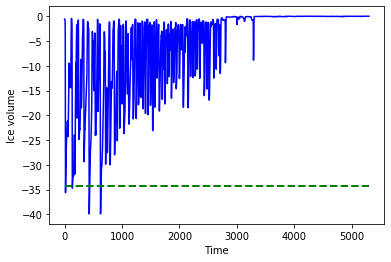

In [14]:
plt.plot(ageP, volP, 'b-')
plt.plot([0, np.max(ageP)], [criticalIceVol, criticalIceVol], 'g--', linewidth=2)
plt.ylabel('Ice volume')
plt.xlabel('Time')
plt.show()

## Determination of age of all glaciations

In [18]:
# make a curve of critical ice volume
c = np.zeros(np.size(volP)) + criticalIceVol

# get ages start and end ages of glaciation periods (find crossing of 2 curves)
idx = np.argwhere(np.diff(np.sign(c - volP))).flatten()
glacAges = ageP[idx]

# in case of curve crossings close to 2 points (idx) program outputs 2 points. This part fix of the double idx 
glacAgesR = np.round(glacAges, 1)
glacAgesR = [ii for n,ii in enumerate(glacAgesR) if ii not in glacAgesR[:n]]

## Print estimated glaciation ages

In [16]:
print("Glaciation ages [ka]:")
for n in range(0, len(glacAgesR)-1, 2):
    print(glacAgesR[n], ' - ', glacAgesR[n+1])

Glaciation ages [ka]:
16.0  -  19.2
134.6  -  138.6
428.0  -  438.6
624.7  -  635.6


## Plot of ice volume curve in the period when glaciations are estimated

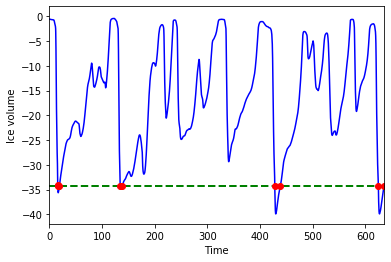

In [17]:
plt.plot(ageP, volP, 'b-')
plt.plot([0, np.max(ageP)], [criticalIceVol, criticalIceVol], 'g--', linewidth=2)
plt.plot(ageP[idx], volP[idx], 'ro')
plt.xlim(0, np.max(glacAgesR)) 
plt.xlabel('Time')
plt.ylabel('Ice volume')
plt.show()